In [4]:
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates

# Load data
df = pd.read_csv('../data/data.coffee.csv')



# Fill missing values in the 'cash_type' column with 'cash'
df['cash_type'] = df['cash_type'].fillna('cash')

# Convert 'datetime' column to actual datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Set datetime column as index
df.set_index('datetime', inplace=True)

# Extract useful features from datetime
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()  # Day name from datetime index
df['month'] = df.index.month_name()  # Month name
df['year'] = df.index.year  # Extract year

# Reorder the columns as per the desired output
df = df[['hour', 'day_of_week', 'year', 'month', 'cash_type', 'card', 'money', 'coffee_name']]

df.rename(columns={'card': 'card_number'}, inplace = True)

# Display the dataframe
df


,hour,day_of_week,year,month,cash_type,card_number,money,coffee_name
datetime,,,,,,,,
2024-03-01 10:15:50.520,10,Friday,2024,March,card,ANON-0000-0000-0001,38.70,Latte
2024-03-01 12:19:22.539,12,Friday,2024,March,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2024-03-01 12:20:18.089,12,Friday,2024,March,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2024-03-01 13:46:33.006,13,Friday,2024,March,card,ANON-0000-0000-0003,28.90,Americano
2024-03-01 13:48:14.626,13,Friday,2024,March,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...,...,...
2025-03-23 10:34:54.894,10,Sunday,2025,March,card,ANON-0000-0000-1158,35.76,Cappuccino
2025-03-23 14:43:37.362,14,Sunday,2025,March,card,ANON-0000-0000-1315,35.76,Cocoa
2025-03-23 14:44:16.864,14,Sunday,2025,March,card,ANON-0000-0000-1315,35.76,Cocoa


Total Revenue: 115431.58
Daily Revenue:
datetime
2024-03-01    396.3
2024-03-02    228.1
2024-03-03    349.1
2024-03-04    135.2
2024-03-05    338.5
Freq: D, Name: money, dtype: float64
Monthly Revenue:
datetime
2024-03-31    7050.20
2024-04-30    6720.56
2024-05-31    9063.42
2024-06-30    7758.76
2024-07-31    6915.94
Freq: ME, Name: money, dtype: float64


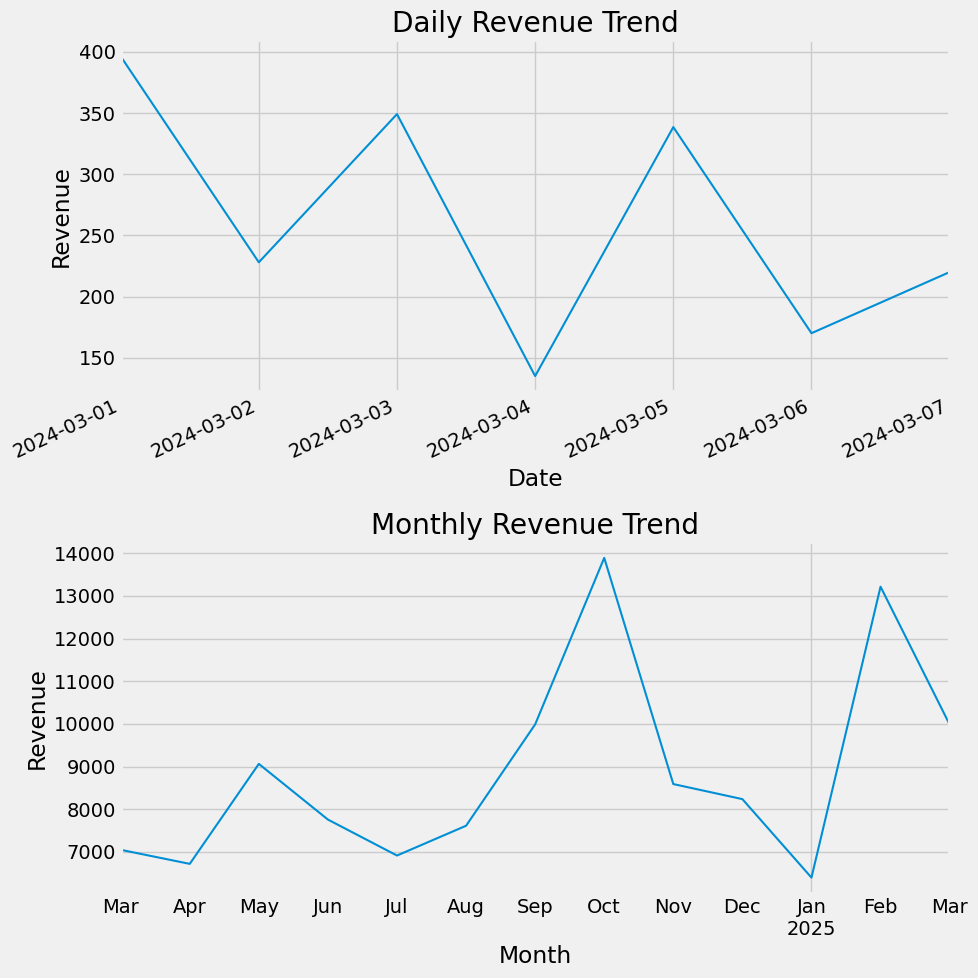

<Figure size 640x480 with 0 Axes>

In [6]:
# Total Revenue
total_revenue = df['money'].sum()

# Daily revenue 
daily_revenue = df.resample('D')['money'].sum()

# Monthly revenue (
monthly_revenue = df.resample('ME')['money'].sum()

# Print the results
print(f'Total Revenue: {total_revenue}')
print(f'Daily Revenue:\n{daily_revenue.head()}')  # Print first few daily revenues
print(f'Monthly Revenue:\n{monthly_revenue.head()}')  # Print first few monthly revenues

# Plotting the results
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))


# Limit daily revenue to the first 7 days
daily_revenue_first_one_week = daily_revenue[:7]

# Plot daily revenue
daily_revenue_first_one_week.plot(ax=ax1, kind='line', title='Daily Revenue Trend', linewidth=1.5)
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Date')

# Formatting x-axis to display actual dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format (e.g., 2024-03-01)
ax1.xaxis.set_major_locator(mdates.DayLocator())  # Tick at daily intervals
ax1.set_xticks(daily_revenue_first_one_week.index)  # Use only the dates in the first one week

# Rotate x-axis labels for better readability
for label in ax1.get_xticklabels():
    label.set_rotation(25)
    label.set_horizontalalignment('right')
# Plot monthly revenue
monthly_revenue.plot(ax=ax2, kind='line', title='Monthly Revenue Trend', linewidth=1.5)
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

plt.savefig('../images/Time Based Total Revenue Trends.png')





Sorted by Total Revenue:
           coffee_name  Sales Volume  Total Revenue
7                Latte           782       27866.30
1  Americano with Milk           824       25269.12
2           Cappuccino           501       18034.14
0            Americano           578       15062.26
6        Hot Chocolate           282       10172.46
3                Cocoa           243        8678.16
4              Cortado           292        7534.86
5             Espresso           134        2814.28

Sorted by Sales Volume:
           coffee_name  Sales Volume  Total Revenue
1  Americano with Milk           824       25269.12
7                Latte           782       27866.30
0            Americano           578       15062.26
2           Cappuccino           501       18034.14
4              Cortado           292        7534.86
6        Hot Chocolate           282       10172.46
3                Cocoa           243        8678.16
5             Espresso           134        2814.28


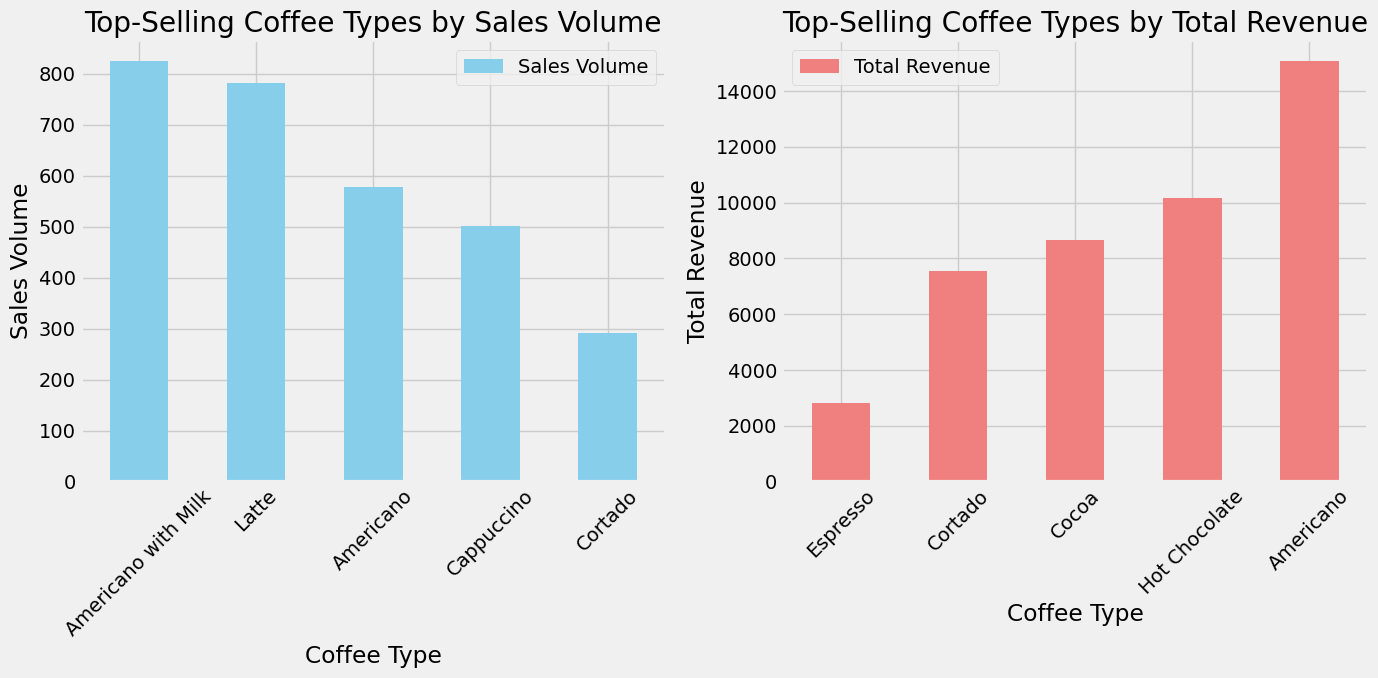

<Figure size 640x480 with 0 Axes>

In [8]:
# Calculate sales volume (number of transactions) for each coffee type
coffee_sales_volume = df.groupby('coffee_name')['money'].count()

# Calculate total revenue for each coffee type
coffee_revenue = df.groupby('coffee_name')['money'].sum()

# Combine both into a single DataFrame
coffee_summary = pd.DataFrame({
    'Sales Volume': coffee_sales_volume,
    'Total Revenue': coffee_revenue
})

# Reset the index to make 'coffee_name' a column again
coffee_summary.reset_index(inplace=True)


# Create the summary DataFrame
coffee_summary_df = pd.DataFrame(coffee_summary)

# Sort by Total Revenue
sorted_by_revenue = coffee_summary_df.sort_values(by='Total Revenue', ascending=False)

# Sort by Sales Volume
sorted_by_sales_volume = coffee_summary_df.sort_values(by='Sales Volume', ascending=False)

# Display the sorted DataFrames
print("Sorted by Total Revenue:")
print(sorted_by_revenue)

print("\nSorted by Sales Volume:")
print(sorted_by_sales_volume)
# Sort the DataFrame based on Sales Volume (descending) and pick the top 5 coffee types
top_sales_volume = coffee_summary_df.sort_values(by='Sales Volume', ascending = False).head(5)

# Sort the DataFrame based on Total Revenue (descending) and pick the top 5 coffee types
top_revenue = coffee_summary_df.sort_values(by='Total Revenue').head(5)

# Plotting the top-selling coffee types by Sales Volume
fig, (ax1, ax2) = plt.subplots( nrows = 1 , ncols = 2, figsize=(14, 7))

# Bar chart for top-selling coffee types by Sales Volume
top_sales_volume.plot(kind='bar', x='coffee_name', y='Sales Volume', ax=ax1, color='skyblue')
ax1.set_title('Top-Selling Coffee Types by Sales Volume')
ax1.set_xlabel('Coffee Type')
ax1.set_ylabel('Sales Volume')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Bar chart for top-selling coffee types by Total Revenue
top_revenue.plot(kind='bar', x='coffee_name', y='Total Revenue', ax = ax2, color='lightcoral')
ax2.set_title('Top-Selling Coffee Types by Total Revenue')
ax2.set_xlabel('Coffee Type')
ax2.set_ylabel('Total Revenue')
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Updated image path
plt.savefig('../images/Top Selling Coffees.png')


Payment Methods:
cash_type
card    3547
cash      89
Name: count, dtype: int64
Payment Methods Generated Revenue:
cash_type
card    112245.58
cash      3186.00
Name: money, dtype: float64
Number of Transactions:
3636
Payment Method  Transaction Percentages:
cash_type
card    97.552255
cash     2.447745
Name: count, dtype: float64
Total Revenue:
115431.58
Payment Method  Revenue Percentages:
cash_type
card    97.239923
cash     2.760077
Name: money, dtype: float64


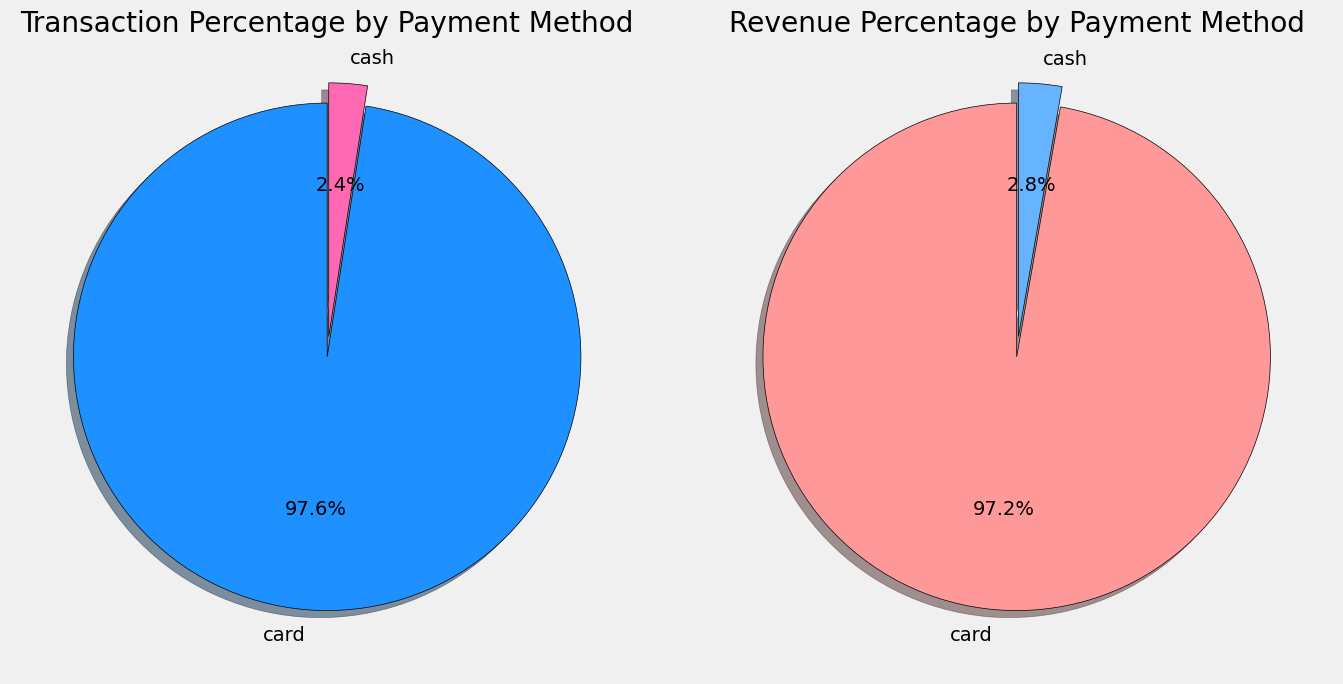

<Figure size 640x480 with 0 Axes>

In [10]:
# Calculate the number of transactions and revenue for each payment method
payment_method_count = df['cash_type'].value_counts()
payment_method_revenue = df.groupby('cash_type')['money'].sum()


# Display the sorted DataFrames
print('Payment Methods:')
print(payment_method_count)

print('Payment Methods Generated Revenue:')
print(payment_method_revenue)



# Calculate percentage of total transactions for each payment method
total_transactions = len(df)
payment_method_transactions_percentage = (payment_method_count / total_transactions) * 100


print('Number of Transactions:')
print(total_transactions)

print('Payment Method  Transaction Percentages:')
print(payment_method_transactions_percentage )
# Calculate percentage of total revenue for each payment method
total_revenue = df['money'].sum()
payment_method_revenue_percentage = (payment_method_revenue / total_revenue) * 100

print('Total Revenue:')
print(total_revenue)

print('Payment Method  Revenue Percentages:')
print(payment_method_revenue_percentage )


# Combine results into a DataFrame for easy viewing
payment_analysis = pd.DataFrame({
    'Transaction Count': payment_method_count,
    'Total Revenue': payment_method_revenue,
    'Transaction Percentage': payment_method_transactions_percentage,
    'Revenue Percentage': payment_method_revenue_percentage
})


# Visualization - Pie charts for transaction percentages and revenue percentages
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

explode = [0, 0.08]
wedgeprops = ({'edgecolor': 'black'} )

# Pie chart for transaction percentages
ax1.pie(payment_method_transactions_percentage, 
        labels=payment_method_transactions_percentage.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#1E90FF', '#FF69B4'], explode = explode , wedgeprops = wedgeprops, shadow = True)
ax1.set_title('Transaction Percentage by Payment Method')

# Pie chart for revenue percentages
ax2.pie(payment_method_revenue_percentage, 
        labels=payment_method_revenue_percentage.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#ff9999', '#66b3ff'], explode = explode , wedgeprops = wedgeprops, shadow = True)
ax2.set_title('Revenue Percentage by Payment Method')
# Display the plots
plt.tight_layout()
plt.show()
plt.savefig('../images/Payment Method Analysis.png')
















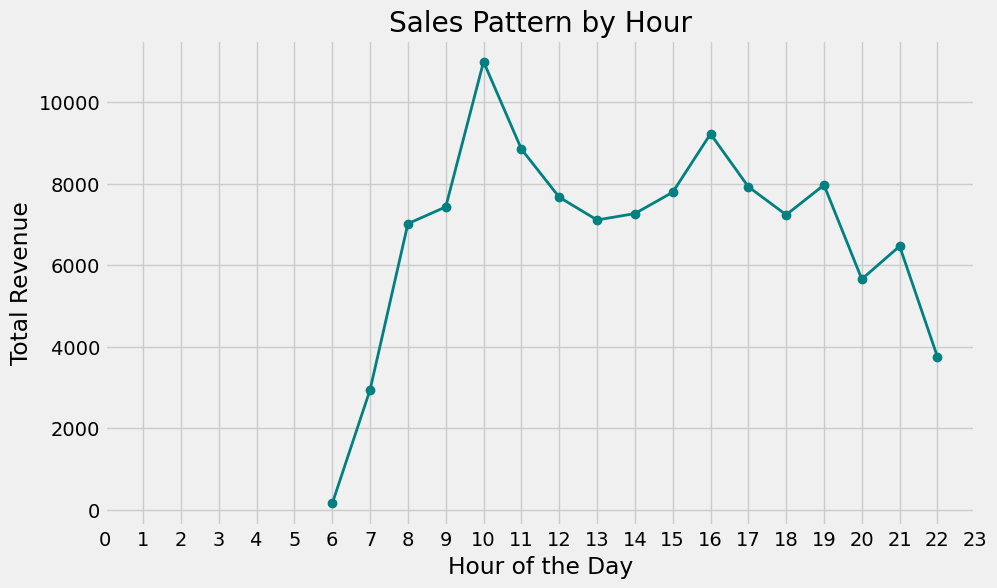

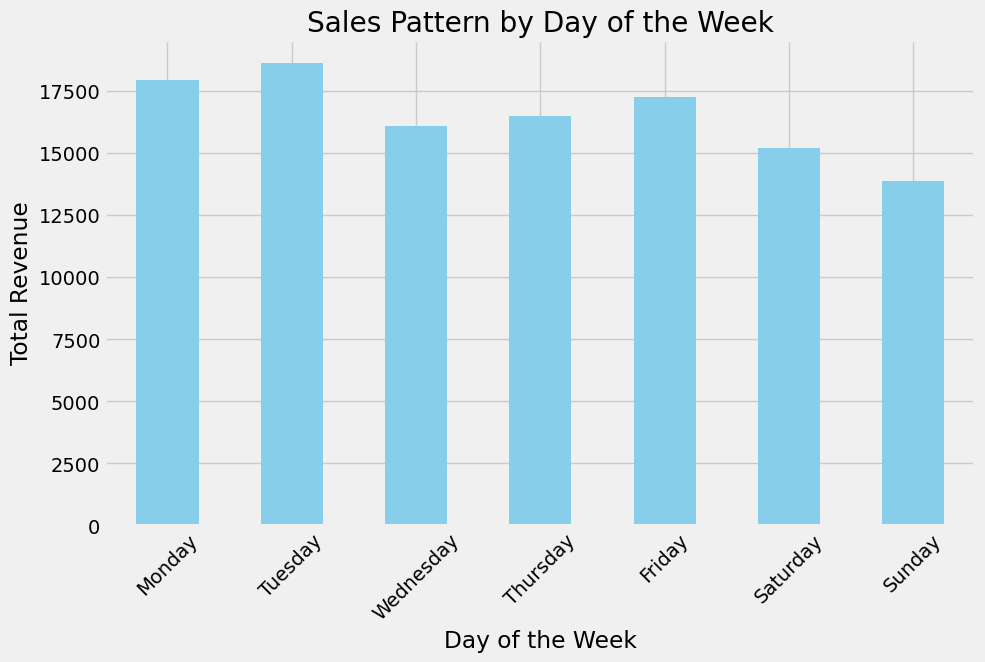

<Figure size 640x480 with 0 Axes>

In [12]:

# 1. Sales by Hour (Identify Peak Times)
hourly_sales = df.groupby('hour')['money'].sum()  # Sum revenue by hour

# Plotting the hourly sales pattern
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', color='teal', marker='o', linewidth=2)
plt.title('Sales Pattern by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(range(24))  # Show every hour
plt.grid(True)
plt.show()

# 2. Sales by Day of the Week
daily_sales = df.groupby('day_of_week')['money'].sum()  # Sum revenue by day of the week

# Reorder days for the correct sequence (Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales[ordered_days]

# Plotting the daily sales pattern
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Pattern by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig('../images/Peak Total Revenue.png')

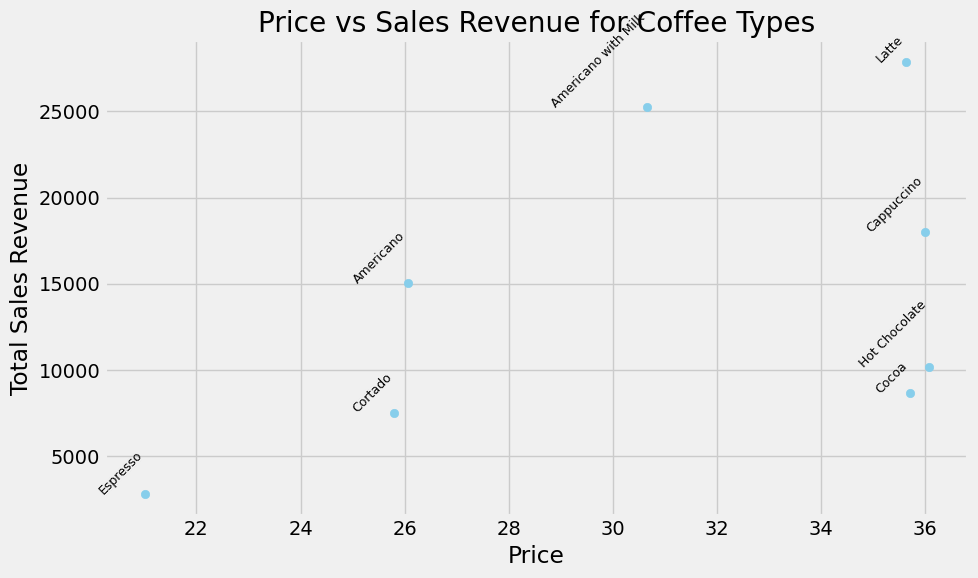

<Figure size 640x480 with 0 Axes>

In [14]:
# Calculate total sales (revenue) for each coffee type
coffee_sales_revenue = df.groupby('coffee_name')['money'].sum()

# Calculate average price for each coffee type
coffee_prices = df.groupby('coffee_name')['money'].mean()  # Assuming you have a 'price' column

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coffee_prices, coffee_sales_revenue, color='skyblue')

# Title and labels
plt.title('Price vs Sales Revenue for Coffee Types')
plt.xlabel('Price')
plt.ylabel('Total Sales Revenue')
plt.grid(True)

# Annotate each point with the coffee name
for i, coffee_name in enumerate(coffee_sales_revenue.index):
    plt.annotate(coffee_name, 
                 (coffee_prices.iloc[i], coffee_sales_revenue.iloc[i]), 
                 fontsize=9, 
                 ha='right',  # Adjust horizontal alignment of text
                 rotation=45)  # Rotate the text for better readability

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('../images/Coffee Sales Analysis.png')


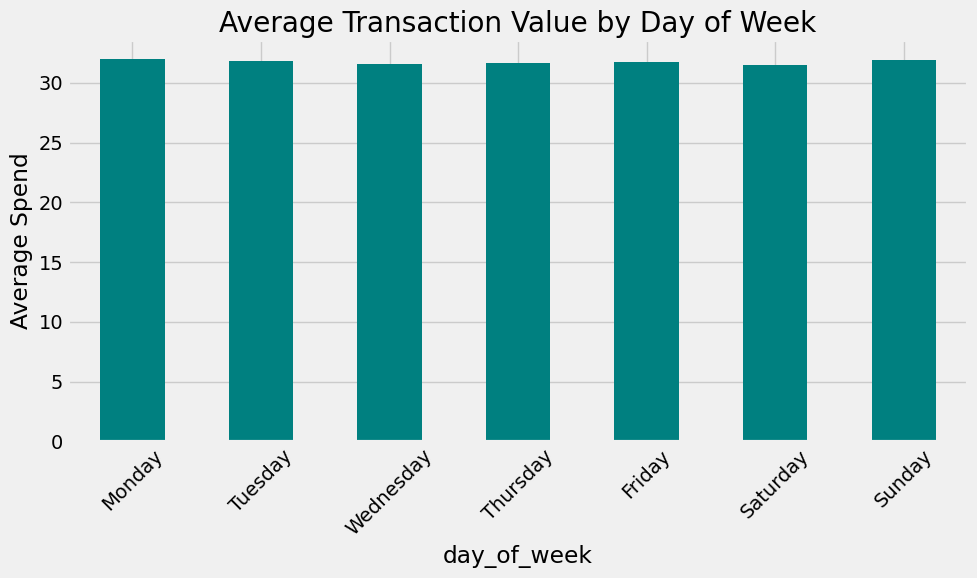

<Figure size 640x480 with 0 Axes>

In [16]:
# ATV by day
atv_by_day = df.groupby('day_of_week')['money'].mean().sort_values(ascending=False)

# ATV by coffee type
atv_by_coffee = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False)

# Define correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the index
atv_by_day = atv_by_day.reindex(day_order)


# Plot average transaction value by day
atv_by_day.plot(kind='bar', title='Average Transaction Value by Day of Week', ylabel='Average Spend', color='teal', figsize=(10, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('../images/AVT Analysis.png')





